In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])
print(iris)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [70]:
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
features = {k:iris['feature_names'][k] for k in range(len(iris['feature_names']))}
X = X.rename(columns=features)
y = y.rename(columns={0:'type'})
dataset = pd.concat([X,y], axis=1)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [72]:
dataset['sepal length (cm)'][:10]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: sepal length (cm), dtype: float64

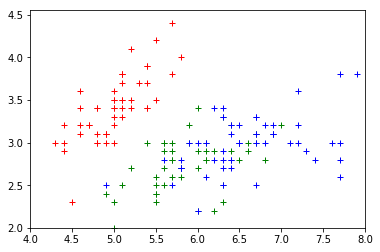

In [95]:
plt.axis([4,8,2,4.55])
plt.plot(dataset["sepal length (cm)"][0:50], dataset["sepal width (cm)"][0:50], 'r+')
plt.plot(dataset["sepal length (cm)"][50:100], dataset["sepal width (cm)"][50:100], 'g+')
plt.plot(dataset["sepal length (cm)"][100:150], dataset["sepal width (cm)"][100:150], 'b+')
plt.show()

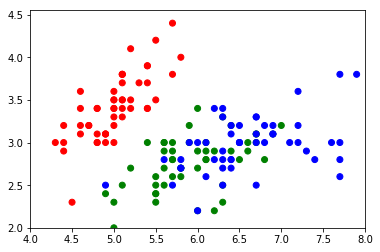

In [97]:
colors = {0:'r', 1:'g', 2:'b'}
plt.axis([4,8,2,4.55])
plt.scatter(dataset["sepal length (cm)"], dataset["sepal width (cm)"], c=dataset['type'].apply(lambda x: colors[x]))
plt.show()

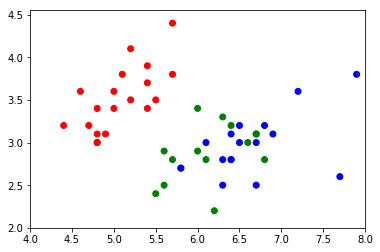

In [117]:
np.random.seed(42)

randomized_dataset = pd.DataFrame(np.random.permutation(dataset))
features.update({4:'type'})
randomized_dataset = randomized_dataset.rename(columns=features)
randomized_datasubset = randomized_dataset[0:50]

colors = {0:'r', 1:'g', 2:'b'}
plt.axis([4,8,2,4.55])
plt.scatter(randomized_datasubset["sepal length (cm)"], randomized_datasubset["sepal width (cm)"], c=randomized_datasubset['type'].apply(lambda x: colors[x]))
plt.show()

In [275]:
X_cols = dataset.columns[0:4]
y_col = dataset.columns[4:]
X_train, X_test, X_validation = randomized_dataset[X_cols][0:100], randomized_dataset[X_cols][100:125], randomized_dataset[X_cols][125:150]
y_train, y_test, y_validation = randomized_dataset[y_col][0:100], randomized_dataset[y_col][100:125], randomized_dataset[y_col][125:150]

X_train.columns, y_train.columns, len(X_train), len(y_train)

(Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'],
       dtype='object'), Index(['type'], dtype='object'), 100, 100)

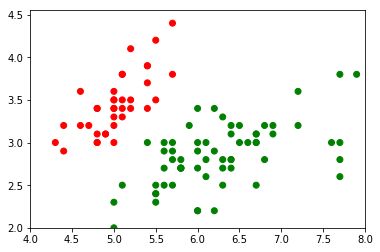

In [276]:
#Linearly Sep:
y_sep_train = y_train.applymap(lambda x: 1 if x>0 else 0)
y_sep_test = y_test.applymap(lambda x: 1 if x>0 else 0)
y_sep_validation = y_validation.applymap(lambda x: 1 if x>0 else 0)

colors = {0:'r', 1:'g', 2:'b'}
plt.axis([4,8,2,4.55])
plt.scatter(X_train["sepal length (cm)"], X_train["sepal width (cm)"], c=y_sep_train['type'].apply(lambda x: colors[x]))
plt.show()

In [277]:
X_train.shape, y_sep_train.shape

((100, 4), (100, 1))

In [303]:
from  sklearn.svm import LinearSVC
svc = LinearSVC(C=0.00065)
svc.fit(X_train, y_sep_train['type'])
y_sep_predict = svc.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_sep_test['type'],y_sep_predict)

array([[ 5,  3],
       [ 0, 17]], dtype=int64)

In [304]:
from  sklearn.svm import LinearSVC
svc_good = LinearSVC()
svc_good.fit(X_train, y_sep_train['type'])
y_sep_predict_good = svc_good.predict(X_test)

confusion_matrix(y_sep_test['type'],y_sep_predict_good)

array([[ 8,  0],
       [ 0, 17]], dtype=int64)

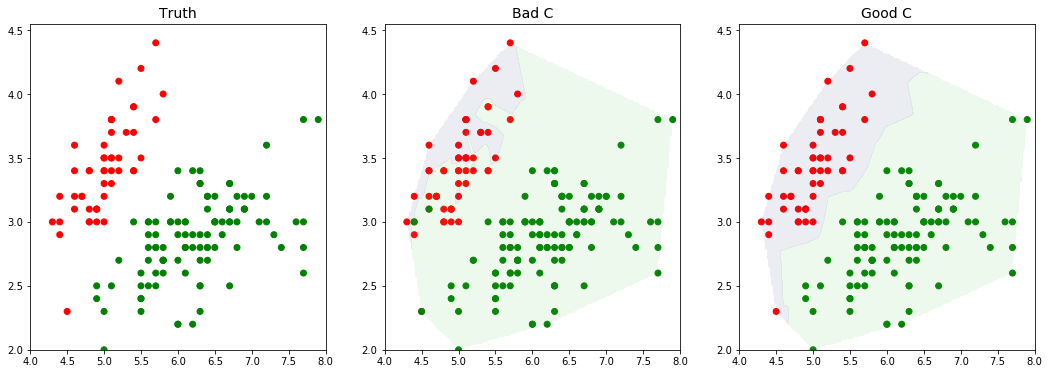

In [305]:
colors = {0:'r', 1:'g', 2:'b'}

fig = plt.figure(figsize=(18, 6)) 
#Real data
plt.subplot(131)
plt.title("Truth", fontsize=14)
plt.axis([4,8,2,4.55])
#plt.scatter(X_test["sepal length (cm)"], X_test["sepal width (cm)"], c=y_sep_test['type'].apply(lambda x: colors[x]))
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=list(map(lambda x: 'g' if x>0 else 'r', y['type'])) )

plt.subplot(132)
plt.title("Bad C", fontsize=14)
plt.axis([4,8,2,4.55])
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=list(map(lambda x: 'g' if x>0 else 'r', y['type'])) )
plt.scatter(X_test["sepal length (cm)"], X_test["sepal width (cm)"], c=list(map(lambda x: colors[x], y_sep_predict.tolist())) )

# grid the data.
from matplotlib.mlab import griddata
zi = griddata(X["sepal length (cm)"], X["sepal width (cm)"], 
              svc.decision_function(X), xi, yi, interp='linear') 
plt.contourf(xi, yi, zi, 0, alpha=0.1)


plt.subplot(133)
plt.title("Good C", fontsize=14)
plt.axis([4,8,2,4.55])
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=list(map(lambda x: 'g' if x>0 else 'r', y['type'])) )

# define grid.
xi = np.linspace(4,8, 200)
yi = np.linspace(2,4.55, 200)
# grid the data.
from matplotlib.mlab import griddata
zi = griddata(X["sepal length (cm)"], X["sepal width (cm)"], 
              svc_good.decision_function(X), xi, yi, interp='linear') 
plt.contourf(xi, yi, zi, 0, alpha=0.1)

plt.show()

# MNIST

In [308]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([ 1.,  6.,  6., ...,  0.,  2.,  9.]))

In [329]:
X_t_sub = X_train
y_t_sub = y_train
X_test_sub = X_test
y_test_sub = y_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_t_sub.astype(np.float32))
X_test_scaled = scaler.transform(X_test_sub.astype(np.float32))

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svc_good = SVC(kernel='rbf', decision_function_shape="ovr", C=10)
svc_good.fit(X_train_scaled, y_t_sub)
y_sub_predict = svc_good.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_sub, y_sub_predict))
confusion_matrix(y_test_sub, y_sub_predict)

0.9727


array([[ 966,    0,    3,    3,    1,    2,    3,    1,    1,    0],
       [   0, 1127,    3,    0,    0,    1,    2,    1,    1,    0],
       [   6,    3,  999,    1,    2,    0,    1,   12,    7,    1],
       [   0,    0,    3,  986,    1,    6,    0,    7,    6,    1],
       [   0,    0,    8,    0,  951,    2,    3,    7,    1,   10],
       [   4,    0,    2,    7,    3,  860,    4,    6,    5,    1],
       [   5,    2,    1,    0,    3,    8,  935,    2,    2,    0],
       [   0,    4,   10,    2,    1,    1,    0, 1002,    0,    8],
       [   2,    0,    4,    6,    5,    9,    0,   10,  933,    5],
       [   1,    5,    3,    7,    9,    3,    0,   12,    1,  968]], dtype=int64)

In [331]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, svc_good.predict(X_train_scaled)))
confusion_matrix(y_train, svc_good.predict(X_train_scaled))

print(accuracy_score(y_test_sub, y_sub_predict))
confusion_matrix(y_test_sub, y_sub_predict)

0.999216666667
0.9727


array([[ 966,    0,    3,    3,    1,    2,    3,    1,    1,    0],
       [   0, 1127,    3,    0,    0,    1,    2,    1,    1,    0],
       [   6,    3,  999,    1,    2,    0,    1,   12,    7,    1],
       [   0,    0,    3,  986,    1,    6,    0,    7,    6,    1],
       [   0,    0,    8,    0,  951,    2,    3,    7,    1,   10],
       [   4,    0,    2,    7,    3,  860,    4,    6,    5,    1],
       [   5,    2,    1,    0,    3,    8,  935,    2,    2,    0],
       [   0,    4,   10,    2,    1,    1,    0, 1002,    0,    8],
       [   2,    0,    4,    6,    5,    9,    0,   10,  933,    5],
       [   1,    5,    3,    7,    9,    3,    0,   12,    1,  968]], dtype=int64)